In [92]:
import copy
import warnings
warnings.filterwarnings('ignore')
import os
import time
import itertools
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [24]:
blobs2_data = pd.read_csv("../datasets/blobs2.csv")
blobs2_label = blobs2_data["label"].values
blobs2_features = blobs2_data.drop(["label"], axis=1).values
blobs2_data.head()

,x,y,label
0,0.543066,3.931424,0
1,2.563694,3.473101,0
2,0.665973,2.781159,0
3,3.552344,1.538645,1
4,1.397117,0.668682,1


In [75]:
def fit_and_show_svm(X, y, kernel='linear', deg=1, eps=0.01):
    print(f"Kernel: {kernel}, degree={deg}")
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)
    svm = SVC(kernel=kernel, degree=deg, probability=True)
    svm.fit(X_tr, y_tr)
    for lab, col in enumerate(['g', 'b']):
        mask = svm.predict(X_tr) == lab
        plt.scatter(X_tr[y_tr == lab, 0], X_tr[y_tr == lab, 1], c=col, s=10)
        plt.scatter(X_tr[svm.support_][y_tr[svm.support_] == lab, 0], X_tr[svm.support_][y_tr[svm.support_] == lab, 1], c=col, s=40, marker='x')
    
    def draw(X_p):
        n = 1000
        x = np.linspace(np.min(X_p[:, 0]), np.max(X_p[:, 0]), n)
        y = np.linspace(np.min(X_p[:, 1]), np.max(X_p[:, 1]), n)
        grid = np.array([x for x in itertools.product(x, y)])
        z = svm.predict_proba(grid)[:, 0]
        pg = grid[np.abs(z - 0.5) < eps]
        plt.scatter(pg[:, 0], pg[:, 1], s=3, c='r')

    draw(X_tr)
    plt.show()

Kernel: linear, degree=1


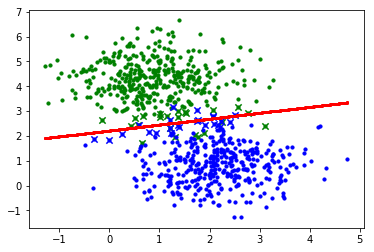

In [76]:
fit_and_show_svm(blobs2_features, blobs2_label, kernel='linear', deg=1, eps=0.001)

Kernel: poly, degree=2


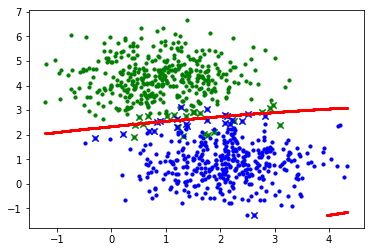

In [77]:
fit_and_show_svm(blobs2_features, blobs2_label, kernel='poly', deg=2, eps=0.001)

Kernel: poly, degree=3


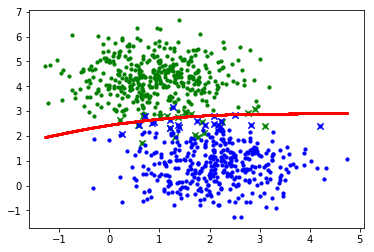

In [79]:
fit_and_show_svm(blobs2_features, blobs2_label, kernel='poly', deg=3, eps=0.001)

Kernel: poly, degree=5


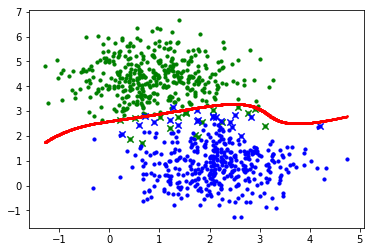

In [80]:
fit_and_show_svm(blobs2_features, blobs2_label, kernel='poly', deg=5, eps=0.001)

Kernel: rbf, degree=1


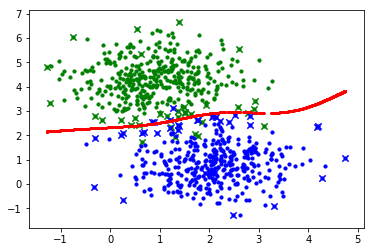

In [81]:
fit_and_show_svm(blobs2_features, blobs2_label, kernel='rbf', deg=1, eps=0.001)

In [85]:
cancer_data = pd.read_csv("../datasets/cancer.csv")
cancer_label = (cancer_data["label"].values == 'M') * 1
cancer_features = cancer_data.drop(["label"], axis=1).values
cancer_data.head()

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
spam_data = pd.read_csv("../datasets/spam.csv")
spam_label = spam_data["label"].values
spam_features = spam_data.drop(["label"], axis=1).values
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [97]:
def svm_time(X, y, **kwargs):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)
    svm = SVC(**kwargs)
    start = time.time()
    svm.fit(X_tr, y_tr)
    print("Accuracy:", np.mean(svm.predict(X_te) == y_te))
    print("Time:", time.time() - start)

In [98]:
def rf_time(X, y, **kwargs):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)
    rfc = RandomForestClassifier(**kwargs)
    start = time.time()
    rfc.fit(X_tr, y_tr)
    print("Accuracy:", np.mean(rfc.predict(X_te) == y_te))
    print("Time:", time.time() - start)

In [115]:
svm_time(cancer_features, cancer_label)
rf_time(cancer_features, cancer_label, n_estimators=1, max_depth=1)
# Не удалось ухудшить лес до уровня SVM, но видно, что он быстрее

Accuracy: 0.6140350877192983
Time: 0.016244888305664062
Accuracy: 0.9035087719298246
Time: 0.0020380020141601562


In [120]:
svm_time(spam_features, spam_label)
rf_time(spam_features, spam_label, n_estimators=1, max_depth=4)

Accuracy: 0.8436482084690554
Time: 1.0597319602966309
Accuracy: 0.8740499457111836
Time: 0.004364967346191406
